In [164]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Demographic Data Aggregation

In [167]:
london = pd.read_csv('lsoa-data.csv', encoding = 'unicode_escape')

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (174,175,176,178,189,253,254) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [168]:
london = london[['Lower Super Output Area','Ethnic Group;White (%);2011',\
 'Household Composition;% Couple household with dependent children;2011',\
 'Household Composition;% Lone parent household;2011',\
'Household Income, 2011/12;Median Annual Household Income estimate (£)',\
'Qualifications;% No qualifications;2011',\
'Qualifications;% Highest level of qualification: Level 1 qualifications;2011',\
 'Qualifications;% Highest level of qualification: Level 2 qualifications;2011',\
'Qualifications;% Highest level of qualification: Level 3 qualifications;2011',\
 'Economic Activity;Unemployment Rate;2011',\
'Tenure;Social rented (%);2011',\
 'Tenure;Private rented (%);2011',\
'Country of Birth;% United Kingdom;2011',\
'2016 Census Population;Age Structure;65+']]


In [169]:
london.insert(4,'% Education: Level 3 or lower', \
              (london['Qualifications;% No qualifications;2011'] +\
               london['Qualifications;% Highest level of qualification: Level 1 qualifications;2011'] + \
               london['Qualifications;% Highest level of qualification: Level 2 qualifications;2011']) + \
             london['Qualifications;% Highest level of qualification: Level 3 qualifications;2011'])

In [170]:
london.drop(columns=['Qualifications;% No qualifications;2011', 'Qualifications;% Highest level of qualification: Level 1 qualifications;2011',\
                    'Qualifications;% Highest level of qualification: Level 2 qualifications;2011', 'Qualifications;% Highest level of qualification: Level 3 qualifications;2011'], inplace=True)

In [171]:
london.insert(6,'% rented (public and private)', london['Tenure;Social rented (%);2011'] + london['Tenure;Social rented (%);2011'])

In [172]:
london.drop(columns = ['Tenure;Social rented (%);2011', 'Tenure;Private rented (%);2011'], inplace=True)

In [174]:
london = london.dropna()
london

,Lower Super Output Area,Ethnic Group;White (%);2011,Household Composition;% Couple household with dependent children;2011,Household Composition;% Lone parent household;2011,% Education: Level 3 or lower,"Household Income, 2011/12;Median Annual Household Income estimate (£)",% rented (public and private),Economic Activity;Unemployment Rate;2011,Country of Birth;% United Kingdom;2011,2016 Census Population;Age Structure;65+
0,E01000907,73.5,12.3,21.1,47.4,30223.0,108.8,9.9,72.2,163.0
1,E01000908,72.4,11.6,13.2,41.6,32049.0,105.2,8.0,70.5,211.0
2,E01000909,84.1,17.9,7.3,32.6,58469.0,37.2,4.9,74.7,289.0
3,E01000912,77.3,12.9,15.7,45.4,31551.0,102.6,8.8,70.4,226.0
4,E01000913,88.2,19.3,3.7,28.8,73024.0,3.8,2.1,72.0,333.0
...,...,...,...,...,...,...,...,...,...,...
4830,E01004328,48.0,15.8,12.7,49.3,28402.0,29.8,9.8,46.7,104.0
4831,E01004329,40.4,16.7,17.3,51.0,26907.0,30.2,9.2,50.1,100.0
4832,E01004330,50.7,21.9,12.8,48.3,30026.0,20.8,7.0,47.3,135.0
4833,E01004331,38.5,18.4,15.4,54.8,26598.0,42.0,8.6,53.3,110.0


In [150]:
london = london.dropna()
london.columns = ['Lower Super Output Area','pct_white', 'fam_w_chidlren','single_w_children','pct_without_college','median income','pct_renters','unemployment_rt',\
                 'native born citzien','number of 65+']

In [34]:
pd.read_excel('ward-atlas-data.xls')

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Population and Age,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,NaN,NaN,NaN,NaN,Population Estimates and Projections,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Median age,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Codes,New Code,Borough,Names,2001,2006.0,2011.0,2013.0,2014.0,2015.0,...,2012.000000,2013.000000,2002,2004.0,2006.0,2008.0,2010.0,2011.0,2012.0,2013.0
2,00AA,E09000001,City of London,City of London,7350,7254.0,7400.0,7993.0,8043.0,8102.0,...,41.429116,41.300000,38,38.0,39.0,40.0,40.0,39.0,40.0,39.0
3,00ABFX,E05000026,Barking and Dagenham,Abbey,10350,10239.0,12900.0,13806.0,14283.0,14739.0,...,29.379914,29.510573,30,30.0,30.0,29.0,29.0,29.0,29.0,29.0
4,00ABFY,E05000027,Barking and Dagenham,Alibon,9350,9236.0,10450.0,10527.0,10563.0,10587.0,...,33.388327,33.825962,36,36.0,35.0,33.0,32.0,32.0,32.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,00BKGU,E05000648,Westminster,Westbourne,11150,12956.0,12750.0,12995.0,13097.0,13217.0,...,34.009888,34.293456,31,31.0,31.0,32.0,32.0,33.0,33.0,33.0
626,00BKGW,E05000649,Westminster,West End,9000,11042.0,10600.0,10972.0,11099.0,11231.0,...,38.799730,38.785851,35,35.0,35.0,35.0,36.0,36.0,36.0,36.0
627,#1,E12000007,NaN,London,7336900,7597825.0,8217450.0,8440005.0,8537306.0,8632873.0,...,35.647492,35.666068,34,34.0,34.0,33.0,33.0,33.0,33.0,33.0
628,#2,E92000001,NaN,England,49449700,50965200.0,53107200.0,53865800.0,54227900.0,54613400.0,...,39.450960,39.553343,38,38.0,38.0,38.0,39.0,39.0,39.0,39.0


## PCA Processing and Cluster

In [99]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# PCA module
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


<AxesSubplot:>

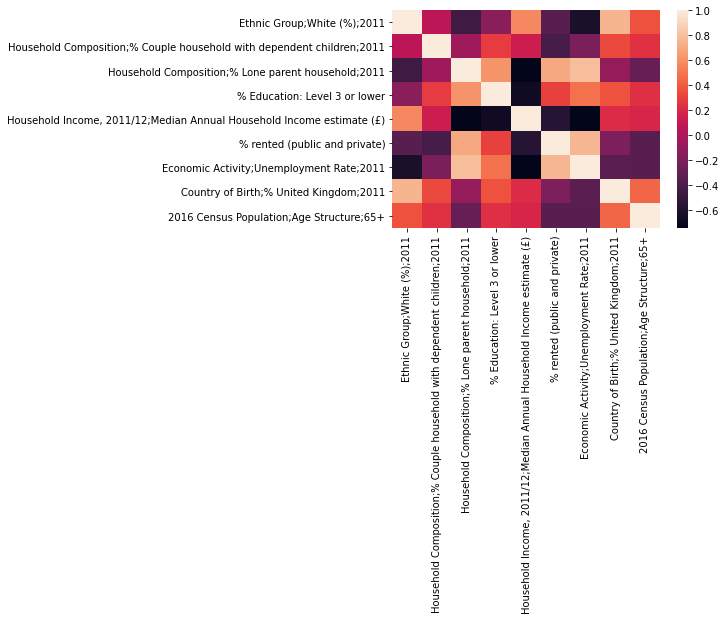

In [175]:
sns.heatmap(london.corr())

In [176]:
scaler = StandardScaler()
londonS = scaler.fit_transform(london.iloc[:,1:])

londonS = pd.DataFrame(index=london['Lower Super Output Area'], columns=london.iloc[:,1:].columns, data=londonS)
londonS

,Ethnic Group;White (%);2011,Household Composition;% Couple household with dependent children;2011,Household Composition;% Lone parent household;2011,% Education: Level 3 or lower,"Household Income, 2011/12;Median Annual Household Income estimate (£)",% rented (public and private),Economic Activity;Unemployment Rate;2011,Country of Birth;% United Kingdom;2011,2016 Census Population;Age Structure;65+
Lower Super Output Area,,,,,,,,,
E01000907,0.628391,-0.996752,1.347361,-0.273293,-0.482904,1.528172,0.724519,0.571053,-0.312385
E01000908,0.574341,-1.110279,0.065585,-0.694131,-0.323550,1.439024,0.167348,0.453770,0.309150
E01000909,1.149236,-0.088540,-0.891691,-1.347155,1.982120,-0.244872,-0.741720,0.743529,1.319144
E01000912,0.815109,-0.899444,0.471210,-0.418410,-0.367010,1.374640,0.401947,0.446871,0.503379
E01000913,1.350694,0.138513,-1.475792,-1.622876,3.252333,-1.071963,-1.562813,0.557255,1.888884
...,...,...,...,...,...,...,...,...,...
E01004328,-0.624585,-0.429120,-0.015540,-0.135433,-0.641823,-0.428120,0.695194,-1.188197,-1.076355
E01004329,-0.998021,-0.283157,0.730810,-0.012084,-0.772291,-0.418215,0.519246,-0.953630,-1.128149
E01004330,-0.491917,0.560183,0.000685,-0.207991,-0.500096,-0.650988,-0.125899,-1.146802,-0.674947


In [177]:
pca = PCA(2)
london2=pca.fit_transform(londonS.iloc[:,1:])
eigenvalues = pca.explained_variance_ratio_
eigenvalues

array([0.46860708, 0.25345467])

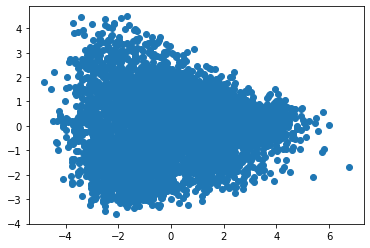

In [178]:
london2 = pd.DataFrame(london2)
plt.scatter(london2[0], london2[1])

In [179]:
SSE = []
for i in range(2,7):
    km = KMeans(n_clusters = i)
    res=km.fit(londonS)
    SSE.append(res.inertia_)
print(SSE)

[29352.476907329645, 23634.060295862877, 19864.965647582023, 17774.25682212906, 16220.889057404542]


In [180]:
SSE = []
for i in range(2,7):
    gm = GaussianMixture(n_components = i)
    res=gm.fit(londonS)
    SSE.append(res.lower_bound_)
print(SSE)

[-8.067806940518633, -7.632062574732016, -7.40738909021258, -7.220132687057042, -7.116154662516506]


In [181]:
km = KMeans(3)
res=km.fit(londonS)
londonS['cluster'] = res.labels_

In [182]:
londonS.groupby('cluster').mean()

,Ethnic Group;White (%);2011,Household Composition;% Couple household with dependent children;2011,Household Composition;% Lone parent household;2011,% Education: Level 3 or lower,"Household Income, 2011/12;Median Annual Household Income estimate (£)",% rented (public and private),Economic Activity;Unemployment Rate;2011,Country of Birth;% United Kingdom;2011,2016 Census Population;Age Structure;65+
cluster,,,,,,,,,
0,0.390355,-0.596430,-0.797738,-1.200627,0.850849,-0.358717,-0.644428,-0.352452,-0.368755
1,0.798690,0.766159,-0.458887,0.464260,0.359501,-0.701447,-0.699281,1.052307,0.939595
2,-0.773788,-0.121292,0.811365,0.463266,-0.780116,0.689739,0.871059,-0.465116,-0.380725


In [183]:
london2['cluster'] = res.labels_

In [184]:

london['cluster'] = res.labels_

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [185]:
london2.groupby('cluster').mean()

,0,1
cluster,,
0,-1.355768,1.434632
1,-1.329569,-1.524214
2,1.739641,0.082628


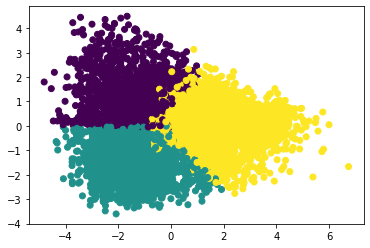

In [186]:
fig, ax = plt.subplots()

plt.scatter(london2[0], london2[1], c=london2['cluster'])

In [187]:
london['cluster'] = res.labels_

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [188]:
london.groupby('cluster').mean()

,Ethnic Group;White (%);2011,Household Composition;% Couple household with dependent children;2011,Household Composition;% Lone parent household;2011,% Education: Level 3 or lower,"Household Income, 2011/12;Median Annual Household Income estimate (£)",% rented (public and private),Economic Activity;Unemployment Rate;2011,Country of Birth;% United Kingdom;2011,2016 Census Population;Age Structure;65+
cluster,,,,,,,,,
0,68.655605,14.768374,7.879065,34.619451,45506.093541,32.602673,5.231774,58.813957,158.646622
1,76.965847,23.170043,9.967511,57.564978,39875.882779,18.762373,5.044718,79.175687,259.688133
2,44.963485,17.698053,17.796486,57.551282,26817.335233,74.941975,10.399715,57.180912,157.722222


In [189]:
lsoa = gpd.read_file("london_lsoa/LSOA_2011_London_gen_MHW.shp")

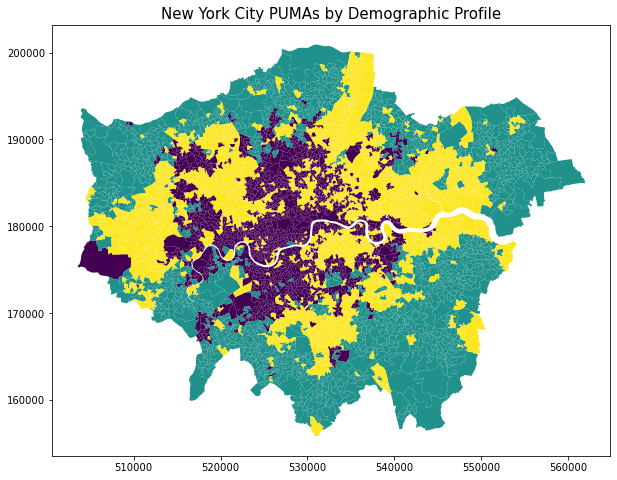

In [190]:
lsoa_demo = lsoa[['LSOA11CD','geometry']].merge(london, left_on='LSOA11CD', right_on='Lower Super Output Area')
lsoa_demo.plot(column='cluster', figsize=(10,10))
plt.title('New York City PUMAs by Demographic Profile', fontsize=15)
plt.savefig('london_demo_map.png')